<div class="alert alert-block alert-info">

**Accessibility of the notebook:**
- You can adjust the width of the text with the function provided below. Copy it into a new code cell and execute it using the `ipykernel`.
    ```python
    from IPython.core.display import HTML
    def set_width(width):
        display(HTML(f"""<style>  
                .container {{ width:{width}% !important; 
                                min-width:800px !important; margin: 0 auto}} 
                .jp-Cell {{ width:{width}% !important; 
                                min-width:800px !important; margin: 0 auto}} </style>"""))
    # Set container width to X% of the fullscreen 
    set_width(50)
    ```
- You can toggle the auto-numbering of the sections in the outline toolbox (sidebar or topbar).
- You can toggle the code line numbers in the dropdown menu of the "view" button in the topbar. 
- You can collapse/expand a cell by clicking the blue bar on the left side of the cell.

</div>

In [1]:
from IPython.core.display import HTML
def set_width(width):
    display(HTML(f"""<style>  
            .container {{ width:{width}% !important; 
                            min-width:800px !important; margin: 0 auto}} 
            .jp-Cell {{ width:{width}% !important; 
                            min-width:800px !important; margin: 0 auto}} </style>"""))
# Set container width to X% of the fullscreen 
set_width(50)

No serial connected
  %serialconnect to connect
  %esptool to flash the device
  %lsmagic to list commands

## ALPACA
This intro supports manuals 2C, 12B, 13C, voltammetry

In this course ALPACA means **Advanced Learning Platform for Analog Circuits and Automation** (https://zenodo.org/record/5615137) which is developed specifically for this course by Jeroen Bastemeijer. In short: the ALPACA is a "pocket Studio Classroom" with devices on board you can use to do experiments. 
The ALPACA has (among others):

* A computer that can be **programmed** to execute instructions
* A simple **function generator**
* A means of **sampling** input signals
* A **breadboard** where you can build circuits


![ChessUrl](https://gitlab.tudelft.nl/mwdocter/nb2214-images/-/raw/main/PicoPI/picopi1_2_assembly.gif "Alpaca+Cria+Picopi")

The Alpaca has features to learn about **digital** systems based on a Raspberry Pi Pico. In addition, it has a number of circuits on board which allow you to study **analog** circuits.

The ALPACA is comprised of three components:
1. The ALPACA board (Colored blue in the video above)
2. The Cria board (Colored green)
3. The Raspberry Pi Pico (AKA "PicoPi", colored red)

<img src="https://gitlab.tudelft.nl/mwdocter/nb2214-images/-/raw/a894a02ef157ca15d3d118eb243245eb912ba4f0/PicoPI/picopi1_11_Flowchart - Visual overview of Pico functionality.jpg" width=50% ></img>

The ALPACA contains a lot of features that can be experimented with. We will consider four features that are relevant to Electronic Instrumentation. Each of these functions is accessed via different methods in either the `machine` module or the `functiongenerator` module.

* Extra information or hints is given in boxes denoted by: <font size=4>ℹ️</font>
* Help fixing programs is given in boxed denoted by: <font size=4>🔥</font>

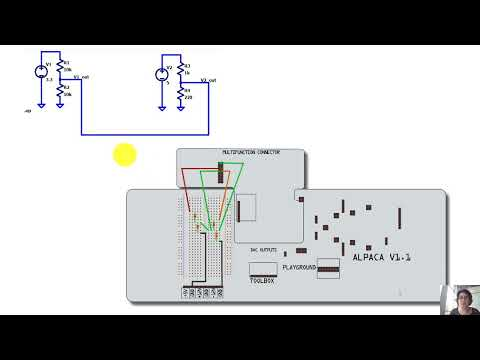

In [1]:
#precap intro movie ALPACA 
%python

from IPython.lib.display import YouTubeVideo
YouTubeVideo('EkGQ5gQo8_Q', width = 600, height = 450)

##  Install the ALPACA software
> <font color='grey'>⏳ Estimated time: 30 min</font>

Before you can start using your ALPACA, you'll need to complete three installation steps **once**. These steps are extensively documented in this notebook.

1. Install Miniconda
2. Create an Miniconda Environment
3. Install the ALPACA firmware on the ALPACA 

You'll also learn how to download Jupyter Notebooks to your computer and **run them locally**. You'll do this for each PicoPi Notebook you make.


> <font size=6>ℹ️</font>
>
> <font color='00a6ed'> Good news: once you've succesfully installed everything, you'll only need to download the notebook again for other Pico Pi assignments. Steps 1-3 only need to be performed once.
    </font>




### Installation Step 1: Installing Miniconda

<font color='ff822d' size=6> 📝 </font> <font color='ff822d' size=4> **Todo**: </font>
    
1. Download the **Individual Edition** of Miniconda from the <a href="https://docs.anaconda.com/miniconda/#miniconda-latest-installer-links" target="_blank">Miniconda website</a> .

2. Follow the instructions to Install Miniconda. Accept all the **default settings**.



### Installation Step 2: Creating a Python Environment

<font color='ff822d' size=6> 📝 </font> <font color='ff822d' size=4> **Todo**: </font>
    
1. Download a "recipe" file for the environment to your computer. Please consult the table below:
    
|             Machine |      Hyperlink    |
|---------------:|:----------------------------------:|
|             PC |      [requirements_windows.txt](https://brightspace.tudelft.nl/d2l/le/content/682272/viewContent/3973020/View)      |
|    Mac (Intel) |        [requirements_mac.txt](https://brightspace.tudelft.nl/d2l/le/content/682272/viewContent/3973019/View)        |
| Mac (M1 or M2) | File pending. Try Intel version or contact NB2214 staff |
        

    
2. Read the instructions for installing the Miniconda environment on <a href="https://brightspace.tudelft.nl/d2l/le/content/682272/viewContent/3972819/View" target="_blank">Brightspace</a>  (hyperlink).

### Installation Step 3: Installing the Alpaca Firmware

   
In order for the ALPACA to know how to respond to your Python code, you need to install MicroPython on the Pico Pi. Follow the instructions below to install Micropython (which we have taken to calling the "firmware" of the ALPACA).

<font color='ff822d' size=6> 📝 </font> <font color='ff822d' size=4> **Todo**: </font>

1. Download the firmware for the Alpaca (`Alpaca_firmware.utf`) from <a href="https://brightspace.tudelft.nl/d2l/le/content/682272/viewContent/3972992/View" target="_blank">Brightspace</a>  (hyperlink). 
2. Remove the USB-B connector (AKA printer cable/power cable) from the ALPACA board.
3. Unplug the micro-USB cable that attaches to the ALPACA from your PC.
4. While pressing the “BOOTSEL” button on the ALPACA, reinsert the USB cable into the PC. Let go of the “BOOTSEL” button after a few seconds. The white, small round "BOOTSEL" button is located on the larger green rectangular Raspberry Pi Pico.
5. When everything is okay, the ALPACA will appear as an flash drive in File Explorer (Windows)/Finder (MacOS)

6. The `Alpaca_firmware.utf` downloaded file must be stored on the ALPACA by dragging and dropping it (or copy it in another way).
7. When the ALPACA has rebooted, Micropython is active and is ready to run Python instructions or programs.

If you ever need to redo this step, you can download or view the manual for installing the firmware (`Alpaca_firmware_manual.pdf`) from <a href="https://brightspace.tudelft.nl/d2l/le/content/682272/viewContent/3972992/View" target="_blank">Brightspace</a>  (hyperlink).


###  Downloading a Notebook (for example this one)

You're nearly there! This is a **Jupyter Notebook**, a document that can contain live code, equations, visualizations, and text. You will be using these notebooks throughout Electronic Instrumentation. Jupyter Notebooks consist of **cells**. Cells like this one simply contain text, while others contain code.

Chances are, that you are currently viewing this notebook online and thus via a browser. Therefore, this notebook cannot interface with any electronics connected to your PC, including the ALPACA. So, Jupyter Notebook needs to be run **locally** (from your device), rather than from the browser. 
    
<font color='ff822d' size=6> 📝 </font> <font color='ff822d' size=4> **Todo**: </font>
    

<img src="https://gitlab.tudelft.nl/mwdocter/nb2214-images/-/raw/194bfd7aea3c1833cd5cc5d5d1ccbfbd21da4392/PicoPI/picopi1_12_Flowchart%20-%20Visual%20overview%20of%20workflow.jpg?inline=false" alt="Visual overview of programming environment" width=50% style="float:right"></img>

1. Download the Notebook from the toolbar at the top of the screen: `File` > `Download as` > `Notebook (.ipynb)`. Save the file to a convenient location on your PC.

2. Open **Miniconda Prompt**. 

    On Windows, this can be done via the Start menu. Alternatively, the pressing the Windows key will bring up a search bar in which `Miniconda Prompt` can be typed. Once the search bar highlights the appropriate application, simply press `Enter`.
    
    On MacOS, this can be done via   Terminal. Simultaneously press the `Command` and `Space` keys to bring up Spolight, type `Terminal`, and hit `Enter`.
    
    > <font size=6>ℹ️</font>
    >
    > <font color='00a6ed'> On a Windows machine, make sure to use Miniconda prompt, and not Windows Terminal! 
    </font>

3. Once Miniconda Prompt has started. You'll need to change the environment from `base (root)` to `nb2214-2025`, if this is not the case already. This can be done using the following command:
    ```bash
    conda activate nb2214-2025
    ```

4. Using the terminal, navigate to the directory in which you have placed the notebook. Do this by typing `cd` into Miniconda Prompt. Then go to File Explorer (Windows) or Finder (MacOS) and find the folder in which the notebook `.ipynb` file lives. Drag the file onto Miniconda prompt. Press enter. For example, if `2C Thevenin equivalent with picoPI.ipynb` is placed on the desktop, your Miniconda Prompt will look something like:
    ```bash
    cd "C:\Users\USERNAME\Desktop"
    ```
    Pressing `Enter` will change the working directory of Miniconda. You'll notice a change in the path between `nb2214-2025` and `>`.
        
        
5. Finally, Jupyter Notebook can be opened by typing:
    ```bash
    jupyter notebook
    ```

6. A browser interface will open. Find the notebook, like `2C Thevenin equivalent with picoPI.ipynb`. Clicking on the file opens the notebook. Close the instance online. **Continue using the local instance.** You should be able to see the images in the local instance as well.
        
        
7. When using the ALPACA on a local instance, you'll need to tell Jupyter that you want to **execute code on the ALPACA rather than on your computer**. This can be done by navigating to the top toolbar of Jupyter and selecting `Kernel` > `Change Kernel` > `ALPACA - USB` or `ALPACA kernel`.

With the ALPACA you can generate and acquire digital and analog signals. 

Before any acquisition you need to make sure the signal is low enough, so it is safe to measure. 

The PicoPi can only handle voltages up to 3.3V. Therefore, it is highly recommended to test the voltage level of your output signal before connecting it to the picoPI. 

### measure with the voltmeter 
You will generate a varying signal via the potmeter, and measure with the Voltmeter. This can be done without connecting the ALPACA to your laptop. 

* At the **potentiometer** (AKA "potmeter") on the Alpaca, connect the leftmost pin to +12V and the rightmost pin to -12V. +12V and -12 V can be found just below the white breadboard. 

<img src="https://gitlab.tudelft.nl/mwdocter/nb2214-images/-/raw/a894a02ef157ca15d3d118eb243245eb912ba4f0/PicoPI/picopi1_15_potmeter.jpg" width=50% style="float:right"></img>

* The middle pin of the potmeter goes to the Voltmeter (left column 4th pin of the Multifunction connector on the Cria). 

<img src="https://gitlab.tudelft.nl/mwdocter/nb2214-images/-/raw/a894a02ef157ca15d3d118eb243245eb912ba4f0/PicoPI/picopi1_17_voltmeter 2.jpg" width=50% style="float:right"></img>

* Turn the knob of the potmeter, and observe the polarity and voltage levels change (visualised by the LEDs of the voltmeter). 
    * negative polarity --> will damage the picopi (input pins)
    * input voltage > 3.3 V --> again damage the picopi 
    
Note: Make sure to first power down a circuit, so disconnect the supplies, before removing wires from the circuit. If you remove the wrong one, you could fry the picopi with a too high or negative voltage. 

<img src="https://gitlab.tudelft.nl/mwdocter/nb2214-images/-/raw/main/PicoPI/2c_voltmeter_test.jpg" width="75%"/>

* Pay attention to cleaning up the circuit: **remove the signal wires first**. So first remove the wire from the middle pin. **WHY?** Well, if you remove one of the outer pins, there is no divider and current anymore, and the middle pin goes to the still attached + or -12V. 
* Luckily the middle pin was connected to the voltmeter, but if it was connected to the Analog or Digital Inputs you would have damaged your picoPI (replacement is possible, but depends on availability of our soldering expert and results in delay on your side). 


## Alpaca Breadboard
You can make a circuit with on board voltage supplies and measure with the voltmeter. All components are placed on the breadbaord. This can be done without connecting the ALPACA to your laptop. 
   
The breadboard has the pins on a row (in the middle) and column (on the edges) connected. Therefore wisely position your resistor (vertically). :  
    
<img src="https://gitlab.tudelft.nl/mwdocter/nb2214-images/-/raw/a894a02ef157ca15d3d118eb243245eb912ba4f0/PicoPI/picopi2_4_pico1-use_breadboard.jpg" width=70% ></img>



##  Connect to the Alpaca 

Before starting, a connection to the ALPACA needs to be established. This is done by using a micro-USB cable to connect the PicoPi to a PC. In order to connect to the PicoPi, we need to know which `COM` port it is connected to. This `COM` port is simply how the computer tells apart which devices it is connected to (using a serial port interface). You might already have figured out which it is on your device. If you don't know this yet, follow the steps below:

---
**On Windows:**
<img src="https://gitlab.tudelft.nl/mwdocter/nb2214-images/-/raw/a894a02ef157ca15d3d118eb243245eb912ba4f0/PicoPI/picopi1_6_device manager.jpg" width=50% style="float:right"></img>
* Press the Windows key
* Type "device manager" and hit `enter`
* Find the category called `Ports (COM & LPT)` and press the `>` icon to open the drop-down menu
* Here you'll find all the devices connected via `COM` ports. The exact name and number will differ from device to device, but Pico will most likely be the device called `USB Serial Device (COM#)`, where `#` is a single-digit number. In the image below, this number is 4. 

---
**On MacOS:**
* Press the `Command` + `Space`
* In the search bar that pops up, type `Terminal`
* When a result pops up, press enter. A command line window will open.
* Into the command line, type the following: `ls /dev/tty.*`
* Devices connected over serial will then be listed in the format: `screen /dev/tty.[yourSerialPortName] [yourBaudRate]`


---
**Now it is time to connect.** In the cell below, enter the appropraite `COM` port. Your code should look something like: 

`%serialconnect to --port="COM4"`

In [10]:

%serialconnect to --port="COM3" 


Connecting to --port=COM3 --baud=115200 
Ready.



> <font size=6>ℹ️</font>
    >
    > <font color='00a6ed'>
If everthing went well, the cell should give a response that looks like: 
    > </font>
>
> `Connecting to --port=COM4 --baud=115200`
>
> `Ready.`

    
> <font size=6>🔥</font>  
>
> <font color='ff6723'>
> If is is not the case, please check the following:
> 
> * Are both USB cables plugged all the way? Both into the PC and the ALPACA? 
> * Are all three LEDs (+5, +12, -12V) on, left bottom corner of the ALPACA?
> * Did you install the ALPACA firmware (Installation step 3)?
> * Did you change the kernel? `Kernel` > `Change Kernel` > `ALPACA - USB`
> * If you are using a USB hub or adapter, try using a different port or removing the hub all together.
> * Did you double check whether the COM number is correct in Device Manager (Windows) or Terminal (MacOS)?
> * Did the cell give any alternative COM ports? Try these!
> * Ask a friend or a TA for help!
> </font>

## Generate a sine with the DAC 

With the onboard DAC, you can generate a DC but also an AC signal. The outputpin to connect to is DAC-A. For testing the code below, cnnect DAC-A to the onboard Vltmeter. 
Run the code below and see whether you measured a signal.

See the ALPACA code manual for more output functions of the FuncGen. 

In [12]:
from functiongenerator import FuncGen, Sine
from machine import ADC, Pin
import time
 
a0 = ADC(26)
#a1 = ADC(27)
samples = []

with FuncGen(Sine(Vpp=2, offset=2, freq=25)):
    time.sleep(10)



[3.276585]


## Generate a signal with a digital pin out
You can also generate a signal from a digital pin. Select the pin as output, connect it to the voltmeter and observe its functioning:

In [ ]:
from machine import ADC, Pin
import time

import matplotlib.pyplot as plt
import numpy as np

from machine import Pin
Dout = Pin(14, Pin.OUT) 

for ii in range(1000):
    time.sleep_ms(1)
    if ii == 50: # Do this once, and don't forget to turn it off once the loop ends
        Dout.value(True)
        print(ii, "samples acquired\nEnabling Dout0 (Pin GP14)\n")
Dout.value(False)


## Record data with analog input pin(s)

While you could connect the signals you want to acquire to the Ain0 pins on the Cria direclty, the prefered way is through the ADCs, which are located at the top right of the ALPACA. These circuits remove the negative part and the too high voltage levels before the signal reaches the input channel of the picopi. 

One needs to set jumpers, which are small black blocks connecting two neighboring pins. 

Set the jumpers as follows:

<img src="https://gitlab.tudelft.nl/mwdocter/nb2214-images/-/raw/main/PicoPI/picopi_default_jumpers.jpg" width=100% ></img>

This is how the jumpers for channel 1 look like in reality:

<img src="https://gitlab.tudelft.nl/mwdocter/nb2214-images/-/raw/main/PicoPI/picopi4_2_jumper_pos_explanation.jpg" width=100% ></img>



Connect DAC-A to ADC0 - signal+, before running the next code. The FuncGen generates a signal on pin DAC-A, and the ADC0 is connected via the jumpers to a0. 

In [2]:
from functiongenerator import FuncGen, Sine
from machine import ADC, Pin
import time
 
a0 = ADC(26)
#a1 = ADC(27)
samples = []

with FuncGen(Sine(Vpp=2, offset=2, freq=25)):
    voltage = a0.read_u16() * 5.0354e-05 
    ## 3.3V corresponds to 32 bits, or 2**32=65536. From this you can derive the conversion factor 5.034e-05
    samples.append(voltage)
print(samples)



No serial connected
  %serialconnect to connect
  %esptool to flash the device
  %lsmagic to list commands

> <font size=6>🔥</font>  
>
> * If the measured value is far off and close to 0.07V: <br> this is the noise on an open channel. Most likely you have not yet connected the wire to the correct analog input channel


## ALPACA's amplifier & attenuator - into depth

### AC-DC coupling
Similar to the scope in the studio classroom, we can switch between AC and DC coupling mode.

<font color='ff822d' size=6> 📝 </font> <font color='ff822d' size=4> **Todo**: </font>

* Use the jumper closest to the SIGNAL+ pins of the amplifier to switch the AMP0 IN amplfier between the AC/DC coupling modes.
* Note that this corresponds to the top jumper in blue circle in the illustration above showing the jumper settings.
* Having the jumper be on the pins sets the input to DC coupling, whilst having it off sets the input to AC coupling.

###  DC offset 
    
<font color='ff822d' size=6> 📝 </font> <font color='ff822d' size=4> **Todo**: </font>
* For this purpose connect a jumper over the pins called: *WITH OFFSET*, on the amplifier corresponding to *AMP0 IN*. See the image below for the correct jumper settings.
* The jumpers for *AMP1 IN* should not be changed.
* Put *AMP0 IN* in DC coupling mode again.

<div>
<img src="https://gitlab.tudelft.nl/mwdocter/nb2214-images/-/raw/main/PicoPI/picopi8_4_offset_jumper.jpg" width="50%"/>
</div>

The potentiometer above AMP0 IN can now be used to regulate the DC offset that is added to the signal. <br>
Regulate the DC offset of the signal such that the entire output signal can now be visualized. To make it easy to find the right setting for the potentiometer, you can use a special plotting mode unique to NB2211 that allows you to plot the data live. <br>
This function is called `plt.liveplot`. When a number is put into `plt.liveplot`, e.g. `plt.liveplot(x)`, the value `x` will be added as a point on the plot. Note: this only works if the cell containing `plt.liveplot` starts with the "magic command" `%plot --mode live`
    
> <font size=6>🔥</font>  
>
> <font color='ff6723'> 
>
> **WARNING** There is a bug in the Firefox browser that makes the plot flicker. If you are sensitive to this: **BE CAREFUL**
> * For most people the flicker is really annoying anyways. Switching to any other browser will resolve this.
> * The following browsers are have been tested and have been shown to produce smooth images: Edge (Windows), Safari (macOS).
> </font> 

<font color='ff822d' size=6> 📝 </font> <font color='ff822d' size=4> **Todo**: </font>
* Use the live plot to acquire the full signal. Turning the potentiometer clockwise will increase the DC offset, turning it counter-clockwise will lower the DC offset.
    * The range is finicky, so you will need to adjust carefully

In [ ]:
%serialconnect to --port="COM3" 
#ADD COM PORT ABOVE, e.g. --port="COM3"

In [ ]:
%plot --mode live

import time
import numpy as np
import matplotlib.pyplot as plt
from machine import ADC
from functiongenerator import FuncGen, Sine

# Instantiate two measurement pints, one for Ain0 the other for Ain1 to measure the input and output signal
adc0 = ADC(26) 
adc1 = ADC(27)

with FuncGen(Sine(Vmax=0.5, Vmin=0, freq=1)):
    
    time.sleep_ms(100)
    
    for ii in range(400):
        input_signal = adc1.read_u16()
        output_signal = adc0.read_u16()
        input_signal = input_signal / 65535 * 3.3
        output_signal = output_signal / 65535 * 3.3
        plt.liveplot(input_signal , output_signal, labels = ['Input', 'Output'])
        time.sleep_ms(100)

### setting Amplification and attenuation

In the following image the schematic on the left, the circuit diagram on the middle, and the actual implementation are shown.

<div>
<img src="https://gitlab.tudelft.nl/mwdocter/nb2214-images/-/raw/main/PicoPI/Alpaca_jumpers_ADCs.jpg" width="50%"/>
</div>

The jumper placements for the attenuator (J42, or J62) can be set when the amplifier jumpers are placed in location 'B' (1x amplification). The attenuator jumpers then correspond to:
* A, jumper on top:    1:2
* B, jumper on right:  1:1 
* C, jumper on bottom: 1:3
* D, jumper on left:   1:4
* E, no jumper at all: 1:10

For the amplifier, first set the attenuator (J42, or J62) to position 'A'. 
The jumpers that correspond to the gain are GAIN+ (AMP0:J43, AMP1:J63),  and GAIN- (AMP0:J45, AMP1:J65). Both jumpers need to be set equally, to:
* A, jumper on top:     2x
* B, jumper on right:   1x
* C, jumper on bottom:  5x
* D, jumper on left:    6x
* E, no jumper at all: 10x

## DAC assistant - into depth

On the right hand side of the ALPACA, you find the *DAC ASSISTANT*. When you connect your signal from DAC-A (or DAC-B) to `+IN`, then the `OUT` will be defined as follows (with $V_\mathrm{zener}$ = 2.048 V)

$$ V_\mathrm{OUT}= 5 \cdot (V_\mathrm{+IN} - V_\mathrm{zener}) \tag{6}$$

Using this *DAC assistant* you can turn the purely positive signals from *+IN* into signals that both positive and negative value at *OUT*. You'll be using this to turn the purely postive singals from the ALPACA's *DAC* into signals that also have a negative component.

> <font size=5>ℹ️</font>
> <font color='00a6ed'>
> Note that because of the properties of the *DAC ASSISTANT* as described in equation **(6)** you will have to modify your values you plug into the `FuncGen` code. Doing so can be done by rewriting equation **(6)**: $V_\mathrm{+IN} = \frac{V_\mathrm{OUT}}{5} + V_\mathrm{zener}$

<!--
This signal at *OUT*, however will not strictly have an average of at 0 V. You can correct this using a voltage from a potmeter, such that the average will become zero. For now the connections are given, the tuning will be done later:  
* *DAC A* goes to *IN* at the *DAC ASSISTANT*.
* potmeter outer pins go to 0 and 5 V
* middle pin potmeter goes to DAC assist add1

### step 2: adapt the max amplitude of the DAQ assistant output
The DAC assist output is too big, therefore reduce the voltage by using a voltage divider with a factor of 10. The following implementation is done on the breadboard. Another (not shown) implementation is by using one of the onboard amplifiers in attenuation setting; check the Alpaca manual on BrightSpace how to do that). 
* make a voltage divider with 22k as R1, and 220 k as R2. 
* Connect DAC assist out to R1, R1 to R2, and R2 to ground. 
* then use the voltage at the R1-R2 crossing as input voltage for the integrator.
 -->
    
The circuit can be used as an amplifying inverting adder as well. Check out the ALPACA manual for more details. 
    
IMPORTANT: In order to make use of the DAC-assistant the +12V and -12V should be switched on!
